In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import scatterplotmatrix
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
dataset = pd.read_csv('BostonHousing.csv')
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


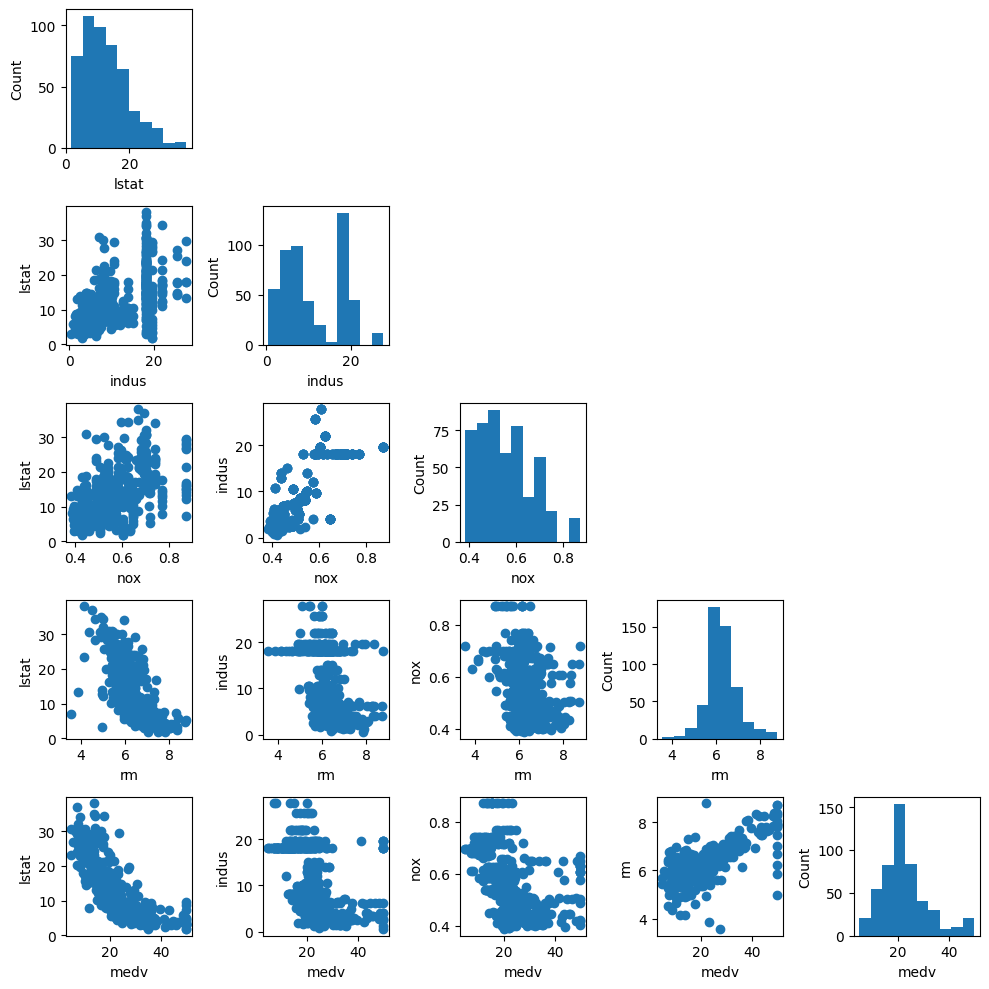

In [ ]:
cols=['lstat','indus','nox','rm','medv']
scatterplotmatrix(dataset[cols].values, figsize=(10,10), names=cols)
plt.tight_layout() #для аккуратного включения подграфиков - подстраивает размер

In [ ]:
X=dataset[['rm']].values
Y=dataset['medv'].values
n=X.shape[0]



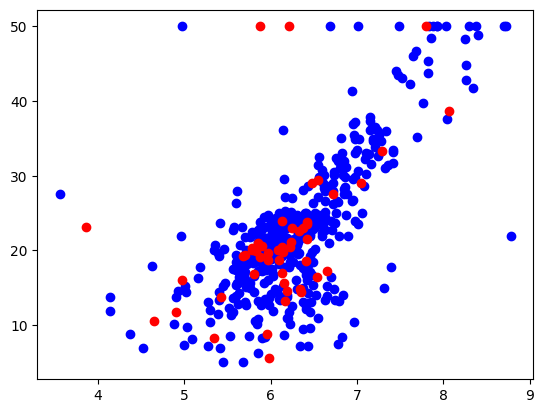

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=1/10,random_state=0)

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

plt.scatter(X_train,Y_train,color='blue')
plt.scatter(X_test,Y_test,color='red')

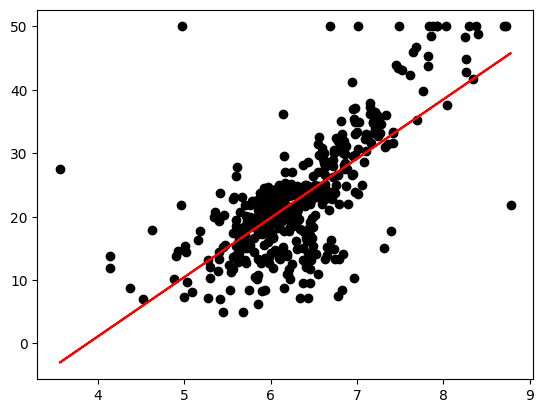

In [ ]:
plt.scatter(X_train,Y_train,color='black')
plt.plot(X_train, regressor.predict(X_train), color='red')

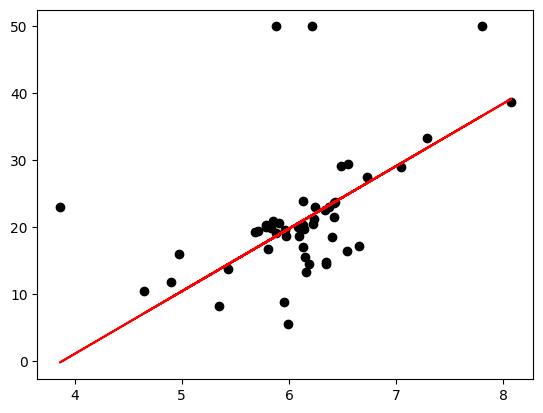

In [ ]:
plt.scatter(X_test,Y_test,color='black')
plt.plot(X_test, regressor.predict(X_test), color='red')

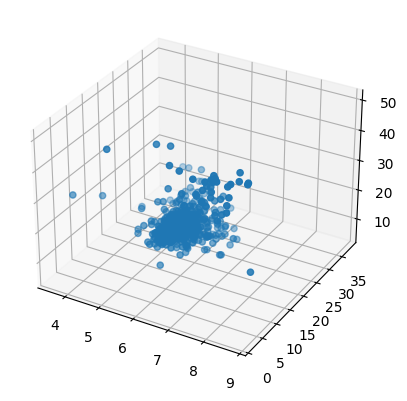

In [ ]:
XX=dataset[['rm','lstat']].values
x1=XX[:,0]
x2=XX[:,1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, Y)

In [ ]:
regressor2 = LinearRegression()
regressor2.fit(XX,Y)
print(XX[5])

YY=regressor2.predict([XX[5]])
print(YY)

[6.43 5.21]
[28.05452701]


Используем псевдообратную матрицу

In [ ]:
N=int(n)
print(N)
K=2
F=np.zeros((N,K+1))#берем на 1 больше, т.к. добавляется 1 для учета bias

for i in range(N):
  F[i,0]=1

for i in range(N-1):
  for j in range(1,K+1):
    F[i,j]=XX[i,j-1]

TrF=np.transpose(F)
M=TrF.dot(F)
print(M)
rp=TrF.dot(Y)
M_inv = np.linalg.inv(M)
theta = M_inv.dot(rp)
print(theta)

YY=regressor2.predict([XX[33]])
print(YY)
Res=theta[0]+theta[1]*XX[33,0]+theta[2]*XX[33,1]
print(Res)

print(np.linalg.cond(M))

506
[[   506.         3173.995      6394.57    ]
 [  3173.995     20198.237347  38634.27162 ]
 [  6394.57      38634.27162  106700.8639  ]]
[ 2.19393737  4.60993664 -0.67877092]
[15.89983805]
16.01973980413693
30733.7099296914


8.78
37.97
6.561


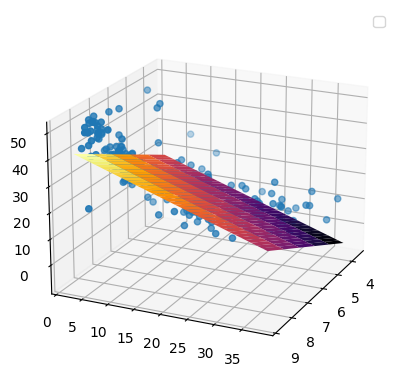

In [ ]:
x1min=min(x1)
x1max=max(x1)
print(x1max)
x2min=min(x2)
x2max=max(x2)
print(x2max)

xx1, xx2 = np.mgrid[x1min:x1max, x2min:x2max]
print(xx1[3,4])
zz = theta[0]+theta[1]*xx1+theta[2]*xx2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, Y)
ax.plot_surface(xx1, xx2, zz, cmap='inferno')
ax.axes.view_init(20, 25) #вращаем график (10,29) - видно более-менее
ax.legend()

Увеличиваем число признаков - портим обусловленность

In [ ]:
XX=dataset[['rm','lstat','indus','nox','crim','b','ptratio','tax','rad','dis','age','chas','zn']].values
regressor2 = LinearRegression()
regressor2.fit(XX,Y)


N=int(n)
print(N)
K=13
F=np.zeros((N,K+1)) #берем на 1 больше, т.к. добавляется 1 для учета bias

for i in range(N):
  F[i,0]=1

for i in range(N-1):
  for j in range(1,K+1):
    F[i,j]=XX[i,j-1]

TrF=np.transpose(F)
M=TrF.dot(F)
Yt=np.transpose(Y)
rp=TrF.dot(Y)

M_inv = np.linalg.inv(M)
theta = M_inv.dot(rp)
print(theta)

YY=regressor2.predict([XX[254]])
print(YY)
Res=theta[0]+theta[1]*XX[254,0]+theta[2]*XX[254,1]+theta[3]*XX[254,2]+theta[4]*XX[254,3]+theta[5]*XX[254,4]+theta[6]*XX[254,5]+theta[7]*XX[254,6]+theta[8]*XX[254,7]+theta[9]*XX[254,8]+theta[10]*XX[254,9]+theta[11]*XX[254,10]+theta[12]*XX[254,11]
print(Res)

print(np.linalg.cond(M))


506
[ 2.31756748e+01  4.53654221e+00 -4.93733419e-01  1.15989241e-02
 -1.21147345e+01 -1.01520825e-01  1.12809162e-02 -7.24293232e-01
 -1.14579336e-02  2.52547463e-01 -1.31013026e+00 -1.53807757e-03
  2.71781735e+00  4.83804884e-02]
[23.97228316]
19.997433976523283
120322577.75711164
